In [4]:
# import Pandas
import numpy as np
import pandas as pd



In [5]:
# read loan.csv file with data type 'unicode'
df = pd.read_csv("loan.csv",dtype='unicode')

In [6]:
# remove employee charactersitic columns
df=df[['loan_amnt','term','int_rate','grade','sub_grade','annual_inc','purpose','dti','emp_length','issue_d','home_ownership','verification_status','loan_status']]

In [7]:
# remove Current value in loan_status column as loan is neither approved nor rejected with loan status Current
options = ['Fully Paid', 'Charged Off']
df = df[df["loan_status"].isin(options)]

In [8]:
df['term'] = df['term'].str[1:3]

In [9]:
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

C:\Users\damod\AppData\Local\Temp/ipykernel_26216/1185577632.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace(r'\D', '')


In [10]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,annual_inc,purpose,dti,emp_length,issue_d,home_ownership,verification_status,loan_status
0,5000,36,10.65%,B,B2,24000,credit_card,27.65,10,Dec-11,RENT,Verified,Fully Paid
1,2500,60,15.27%,C,C4,30000,car,1,1,Dec-11,RENT,Source Verified,Charged Off
2,2400,36,15.96%,C,C5,12252,small_business,8.72,10,Dec-11,RENT,Not Verified,Fully Paid
3,10000,36,13.49%,C,C1,49200,other,20,10,Dec-11,RENT,Source Verified,Fully Paid
5,5000,36,7.90%,A,A4,36000,wedding,11.2,3,Dec-11,RENT,Source Verified,Fully Paid


In [11]:
df.term.unique()
#df.boxplot(column=['loan_status','loan_amnt'])

array(['36', '60'], dtype=object)

In [12]:
# loan_amnt , loan_status relation
df2 = df[['loan_amnt','loan_status']]

In [13]:
df2['loan_amnt']=pd.to_numeric(df2['loan_amnt'],downcast="float")


C:\Users\damod\AppData\Local\Temp/ipykernel_26216/2643676140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['loan_amnt']=pd.to_numeric(df2['loan_amnt'],downcast="float")


<AxesSubplot:title={'center':'loan_amnt'}, xlabel='loan_status'>

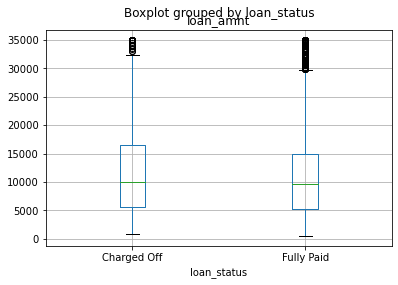

In [14]:

#df2['bins']=np.arange(0,df2['loan_amnt'].max())
df2.boxplot(column='loan_amnt',by='loan_status')

In [15]:
# increase in loan amount increase chance of loan default

In [16]:
# remove % from int_rate column
int_rate_new = df['int_rate'].str.split("%",n=1,expand=True)

In [17]:
#assign first series to column after split
df['int_rate']=int_rate_new[0]

In [18]:
# box plot int_rate , loan_status
df3 = df[['int_rate','loan_status']]

C:\Users\damod\AppData\Local\Temp/ipykernel_26216/1651041008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['int_rate']=df3['int_rate'].astype('float')


<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

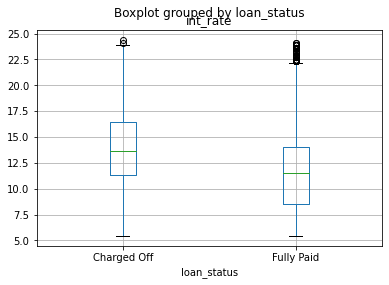

In [19]:
# convert int_rate to float type
df3['int_rate']=df3['int_rate'].astype('float')
df3.boxplot(column='int_rate',by='loan_status')

In [20]:
# box plot shows increase in interest rate has more chances to customer default the loan

In [21]:
# Analysis how term impact loan defualt

In [22]:
df4 = df[['term','loan_status']]

In [23]:
df4.head()

,term,loan_status
0,36,Fully Paid
1,60,Charged Off
2,36,Fully Paid
3,36,Fully Paid
5,36,Fully Paid


In [24]:
df4['term']=df4['term'].astype('float')

C:\Users\damod\AppData\Local\Temp/ipykernel_26216/340583599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['term']=df4['term'].astype('float')


In [25]:
df4.head()

,term,loan_status
0,36.0,Fully Paid
1,60.0,Charged Off
2,36.0,Fully Paid
3,36.0,Fully Paid
5,36.0,Fully Paid


<AxesSubplot:title={'center':'term'}, xlabel='loan_status'>

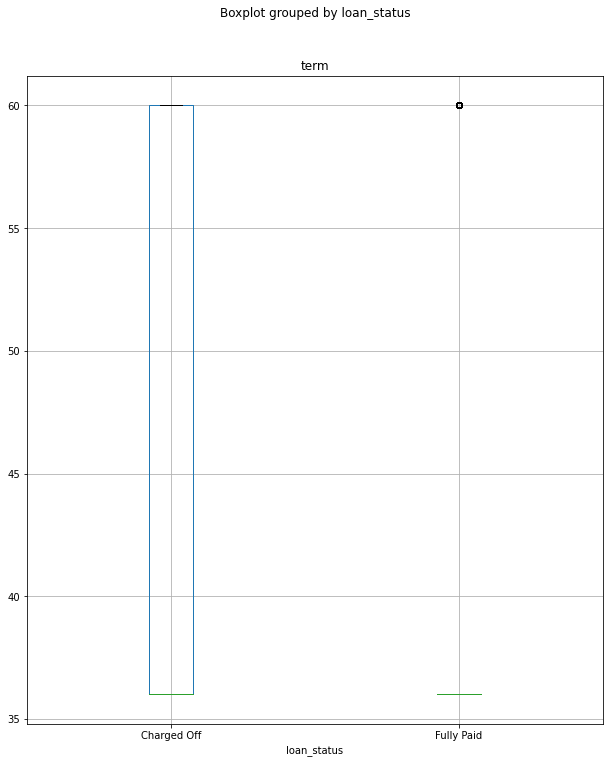

In [27]:
#box plot to analyze impact

df4.boxplot(column='term',by='loan_status',figsize=(10,12))

In [ ]:
#box plot shows increase in term shows increase in loan default

In [187]:
#scatter plot
df4.boxplot(column='term',by='loan_status')

<AxesSubplot:title={'center':'term'}, xlabel='loan_status'>

In [162]:

# analyse annual income relation with loan default
df5 = df[['annual_inc','loan_status']]
df5['annual_inc'] = df5['annual_inc'].astype('float')

C:\Users\damod\AppData\Local\Temp/ipykernel_19592/3359162140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['annual_inc'] = df5['annual_inc'].astype('float')


<AxesSubplot:title={'center':'annual_inc'}, xlabel='loan_status'>

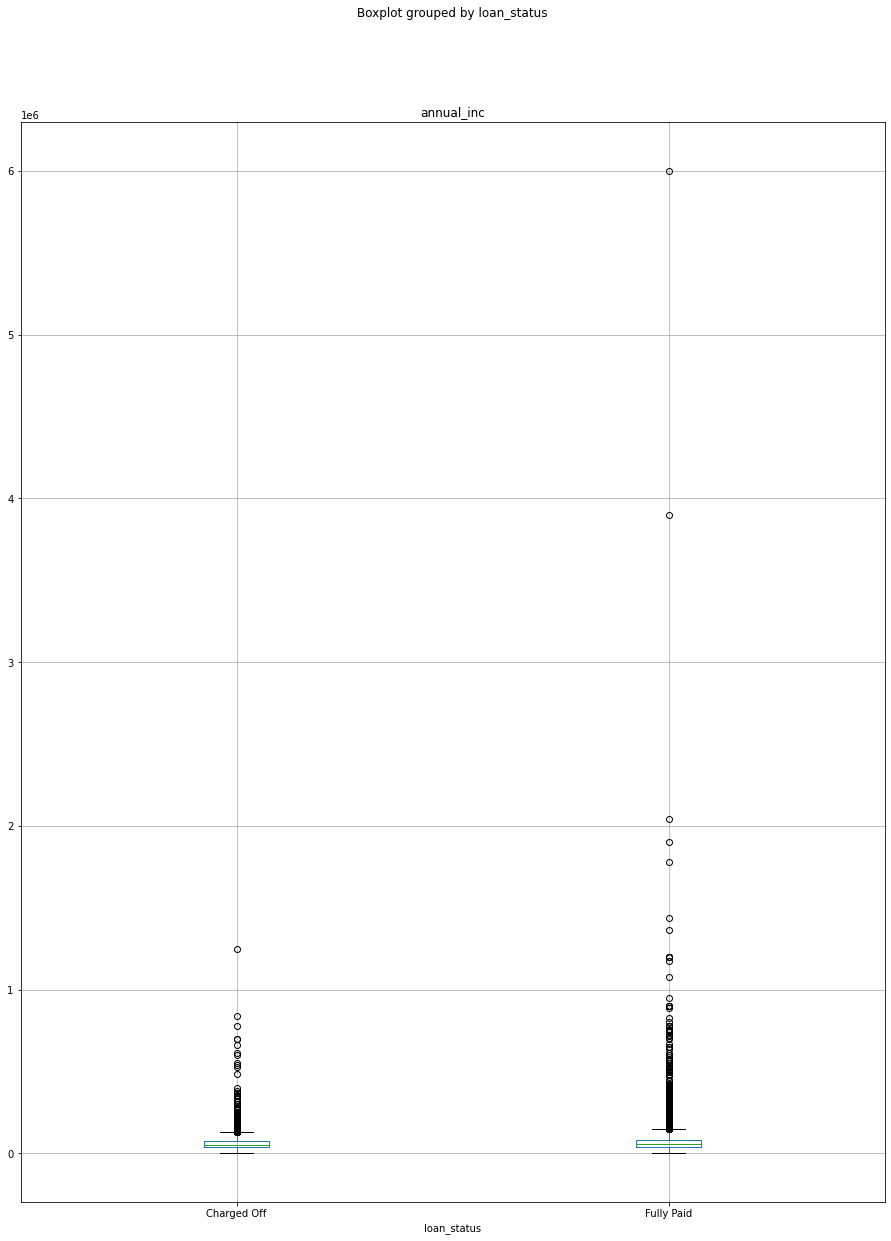

In [172]:
df5.head()
df5.boxplot(column='annual_inc', by='loan_status',figsize=(15,20))


In [173]:
# analyse dti to loan default
df6 = df[['dti','loan_status']]

In [174]:
df6.head()

,dti,loan_status
0,27.65,Fully Paid
1,1,Charged Off
2,8.72,Fully Paid
3,20,Fully Paid
5,11.2,Fully Paid


In [175]:
# convert dti column to float type
df6['dti'] = df6['dti'].astype('float')

C:\Users\damod\AppData\Local\Temp/ipykernel_19592/3140113569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['dti'] = df6['dti'].astype('float')


<AxesSubplot:title={'center':'dti'}, xlabel='loan_status'>

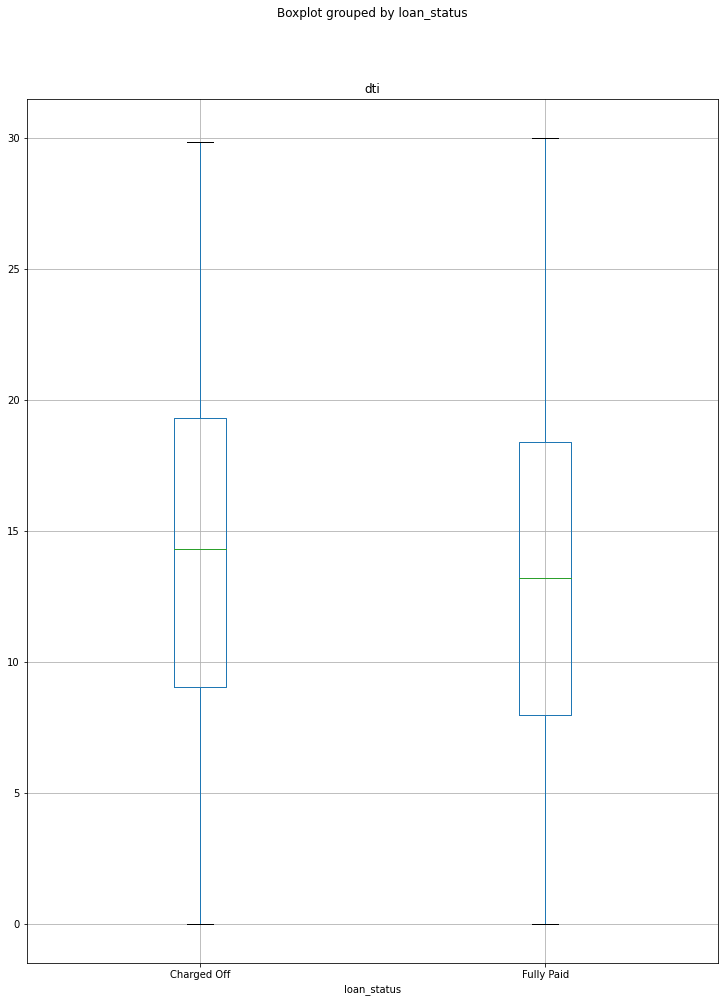

In [177]:
df6.boxplot(column='dti', by = 'loan_status',figsize=(12,16))

In [ ]:
# boxplot shows increase debt to income ration will increase the chance of loan default